# 참고자료

* [혼란한 Matplotlib에서 질서 찾기](https://jehyunlee.github.io/2022/10/16/Python-DS-117-pycon2022/)
* [set_hls](https://jehyunlee.github.io/2022/09/05/Python-DS-112-sethls/)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [2]:
print(sns.__version__)

0.12.1


In [3]:
# 로컬에서(Window) 

plt.rc("font", family = "D2Coding")
plt.rcParams["axes.unicode_minus"] = False

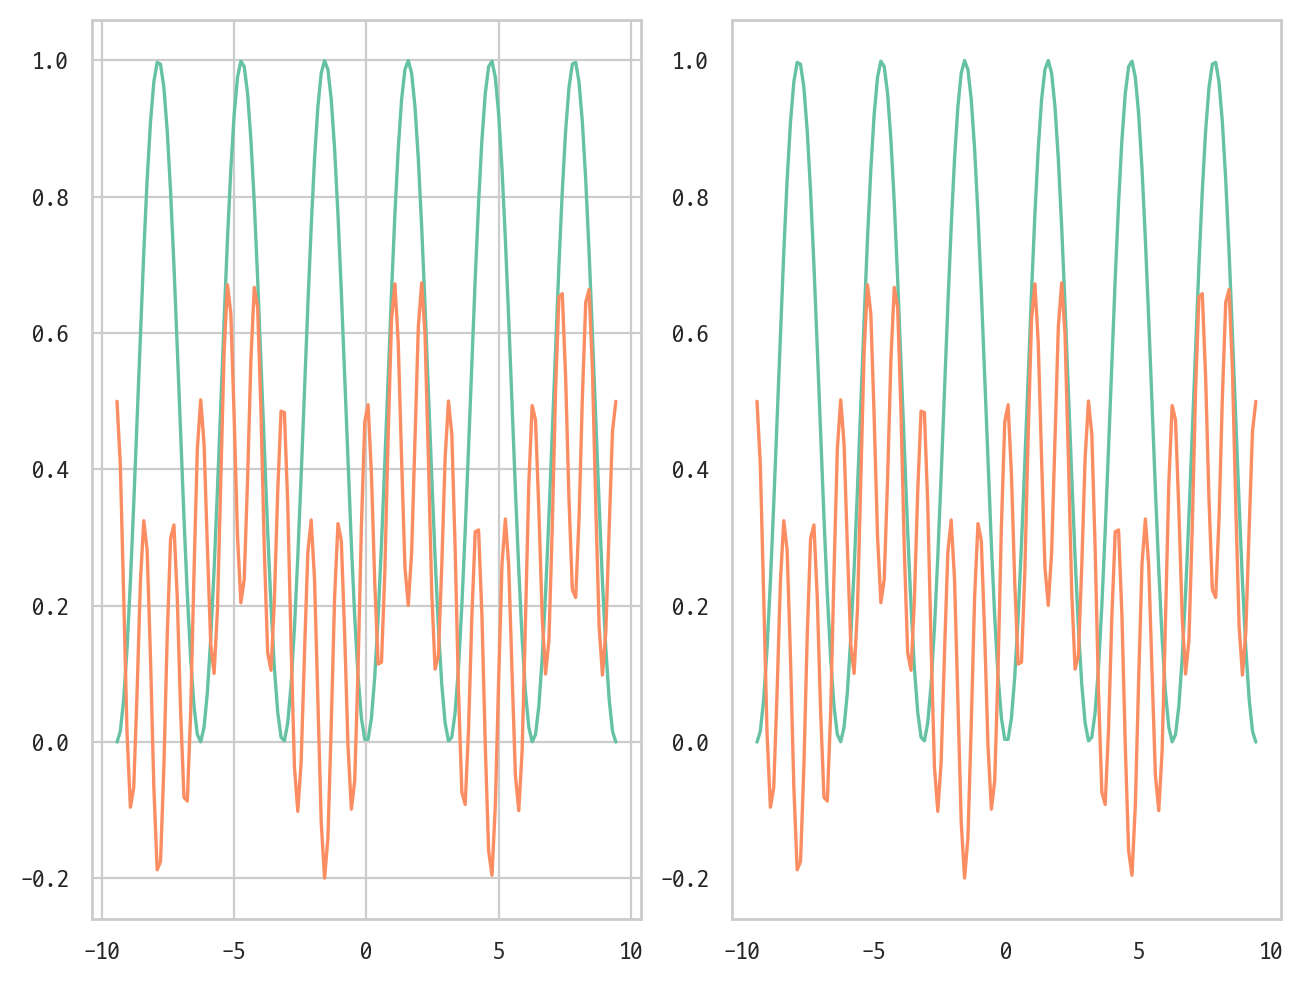

In [4]:
x = np.linspace(-3*np.pi,3*np.pi,150)
y1 = np.sin(x) ** 2
y2 = 0.5*np.cos(3*x) ** (2) + 0.2*np.sin(x)
fig, ax = plt.subplots(1,2)
ax[0].plot(x,y1);
ax[0].plot(x,y2);

ax[1].plot(x,y1);
ax[1].plot(x,y2);
ax[1].grid()


# 1. seaborn 설정을 해 준 경우 비교

In [5]:
# 데이터
x = np.linspace(-2, 2)
x_squared = 0.5 * x ** 2
cosine_x = np.cos(2 * x)

In [6]:
# 시각화


In [7]:
iris = pd.read_csv("./sample/240521/Iris.csv",
                  encoding="utf-8",
                  index_col = 0)

In [8]:
feature_x = "SepalLengthCm"
feature_y = "SepalWidthCm"
feature_additional = "PetalWidthCm"

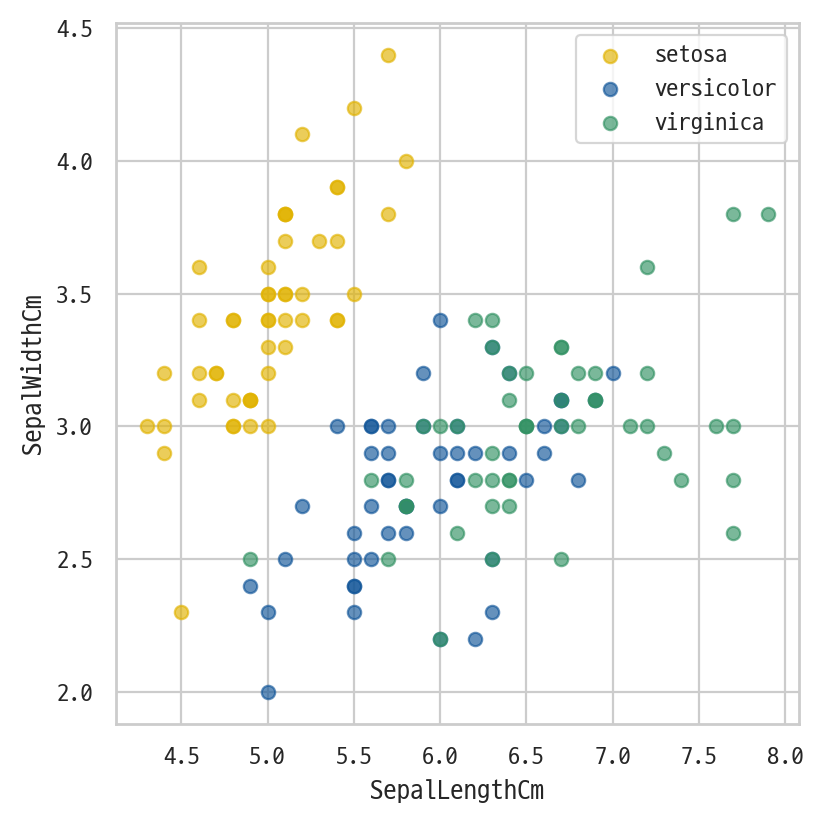

In [9]:
## 위의 그래프를 matplotlib을 이용해서 그리시오.

fig, ax = plt.subplots(figsize=(4,4))
color_dict ={
    'setosa':'#e1b302',
    'versicolor':'#125699',
    'virginica':'#339264'
}
for name, color in color_dict.items():
    df = iris[iris['Species']=='Iris-'+name]
    ax.scatter(data=df,x=feature_x,y=feature_y,marker='o',label=name,c=color,alpha = 0.65)
ax.set(xlabel=feature_x,ylabel=feature_y)
ax.legend()
pass

# 2. 객체 지향 방식으로 그리자

* `matplolib`에는 `matlap`에서 물려받은 두 가지 그림 그리는 방식이 있음
    * 상태 기반 방식: state-based framework
        * 순서대로 그리는 방식
        * `plt.`
    * 객체 지향 방식: object-oriented framework
        * 대상을 지정해 그리는 방식
        * `ax.`

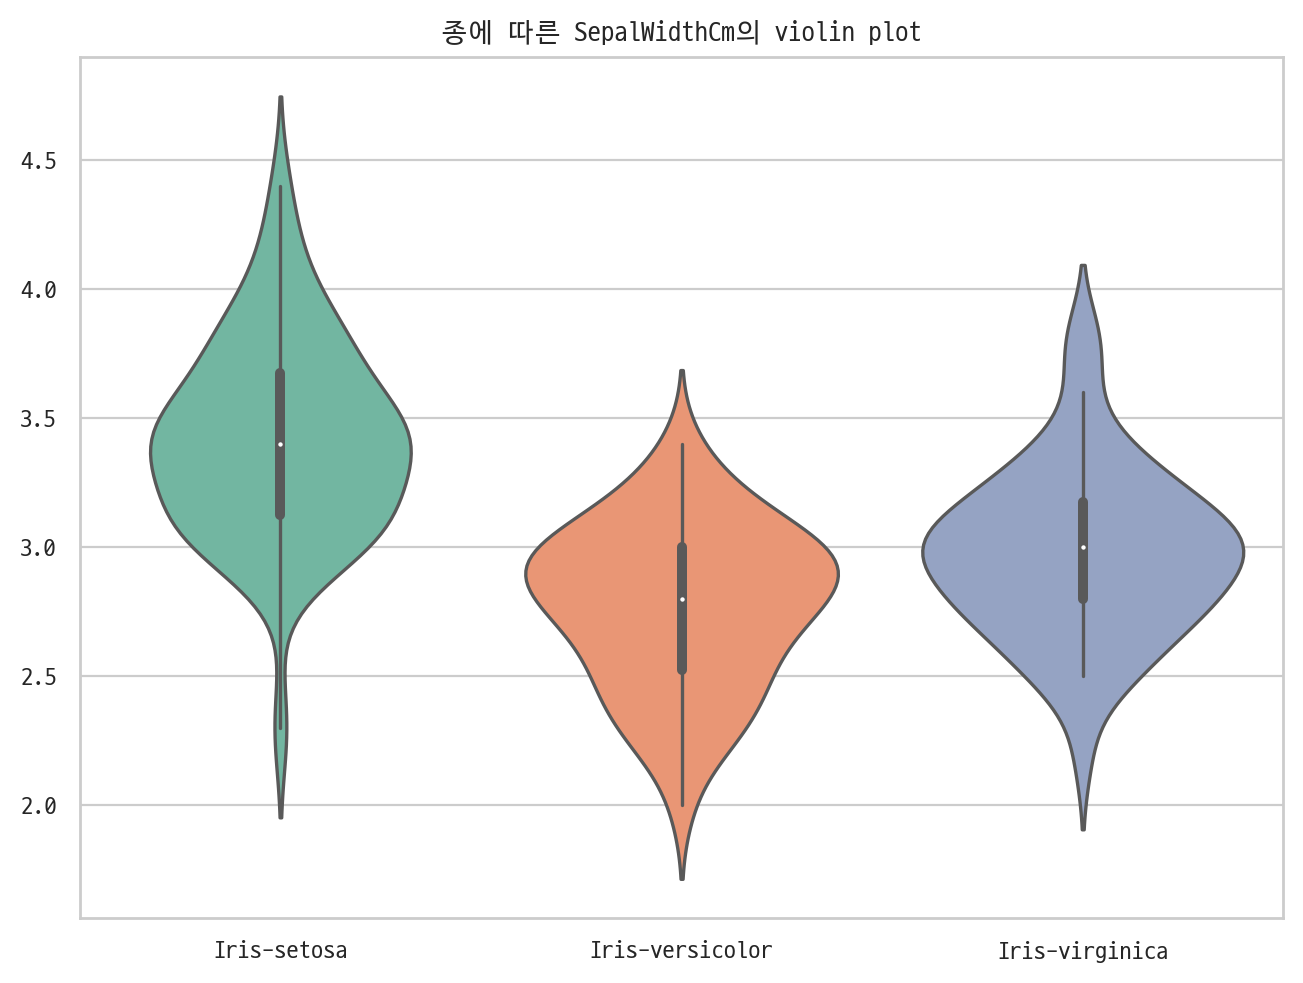

In [10]:
fig, ax = plt.subplots()

sns.violinplot(data = iris,
               x = "Species",
               y = feature_y,
               ax = ax);

ax.set(xlabel = "", 
       ylabel = "",
       title = f"종에 따른 {feature_y}의 violin plot");

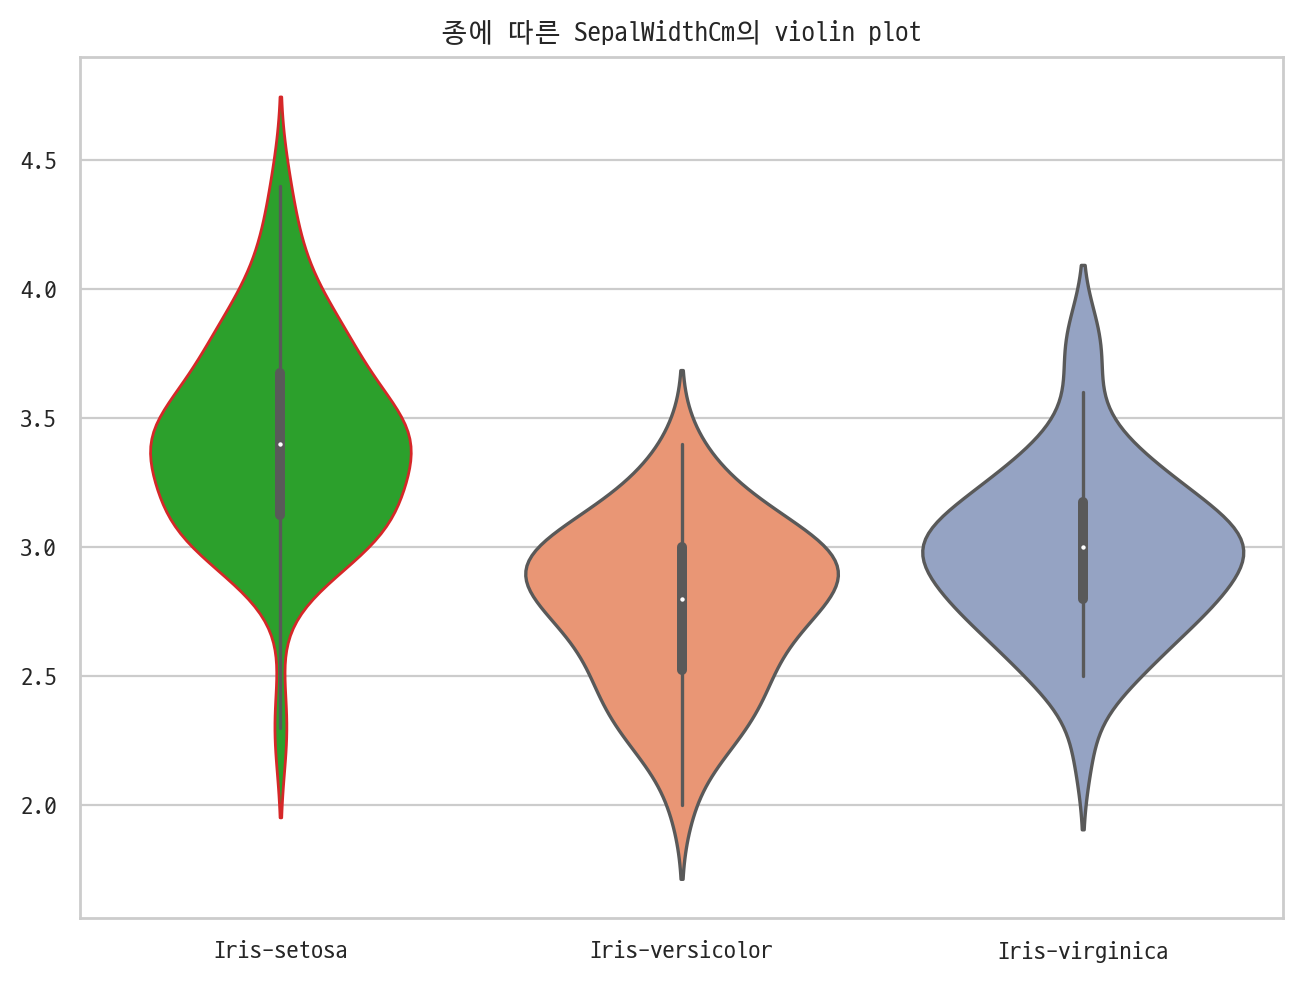

In [11]:
fig, ax = plt.subplots()

sns.violinplot(data = iris,
               x = "Species",
               y = feature_y,
               ax = ax);

ax.set(xlabel = "", 
       ylabel = "",
       title = f"종에 따른 {feature_y}의 violin plot");

color = ['tab:red','tab:green','tab:blue','tab:orange','black','gray']

#collection의 정보 알기

for i, obj in enumerate(ax.collections):
       if i == 0:
              obj.set_ec(color[0]) #edge color
              obj.set_fc(color[1]) #face color
              obj.set_lw(1)
#              obj.set_sizes([30])

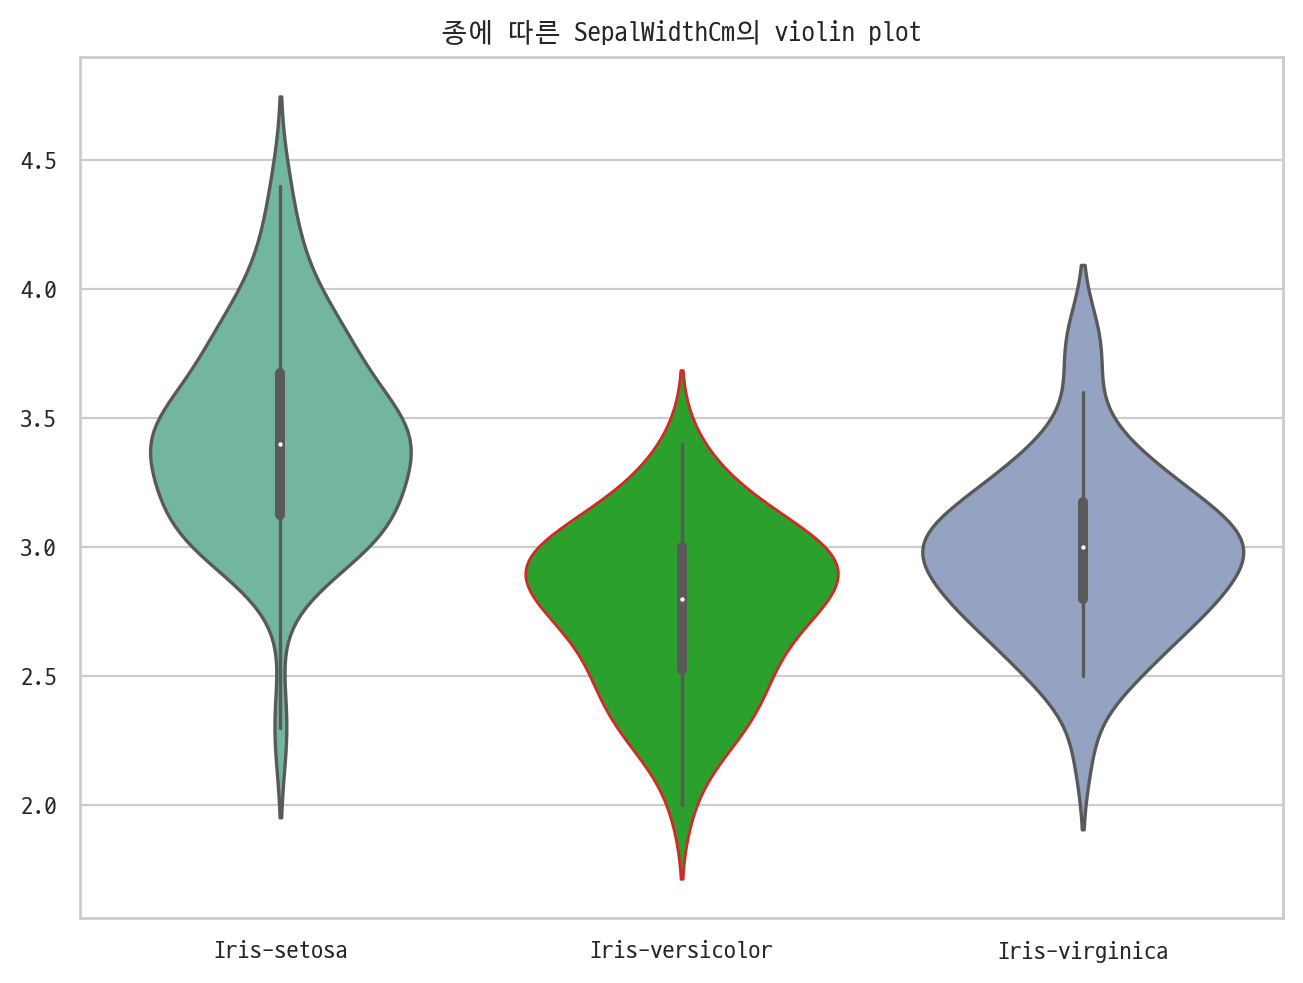

In [12]:
fig, ax = plt.subplots()

sns.violinplot(data = iris,
               x = "Species",
               y = feature_y,
               ax = ax);

ax.set(xlabel = "", 
       ylabel = "",
       title = f"종에 따른 {feature_y}의 violin plot");

color = ['tab:red','tab:green','tab:blue','tab:orange','black','gray']

#collection의 정보 알기

for i, obj in enumerate(ax.collections):
       if i == 2:
              obj.set_ec(color[0]) #edge color
              obj.set_fc(color[1]) #face color
              obj.set_lw(1)
              #obj.set_sizes([30])

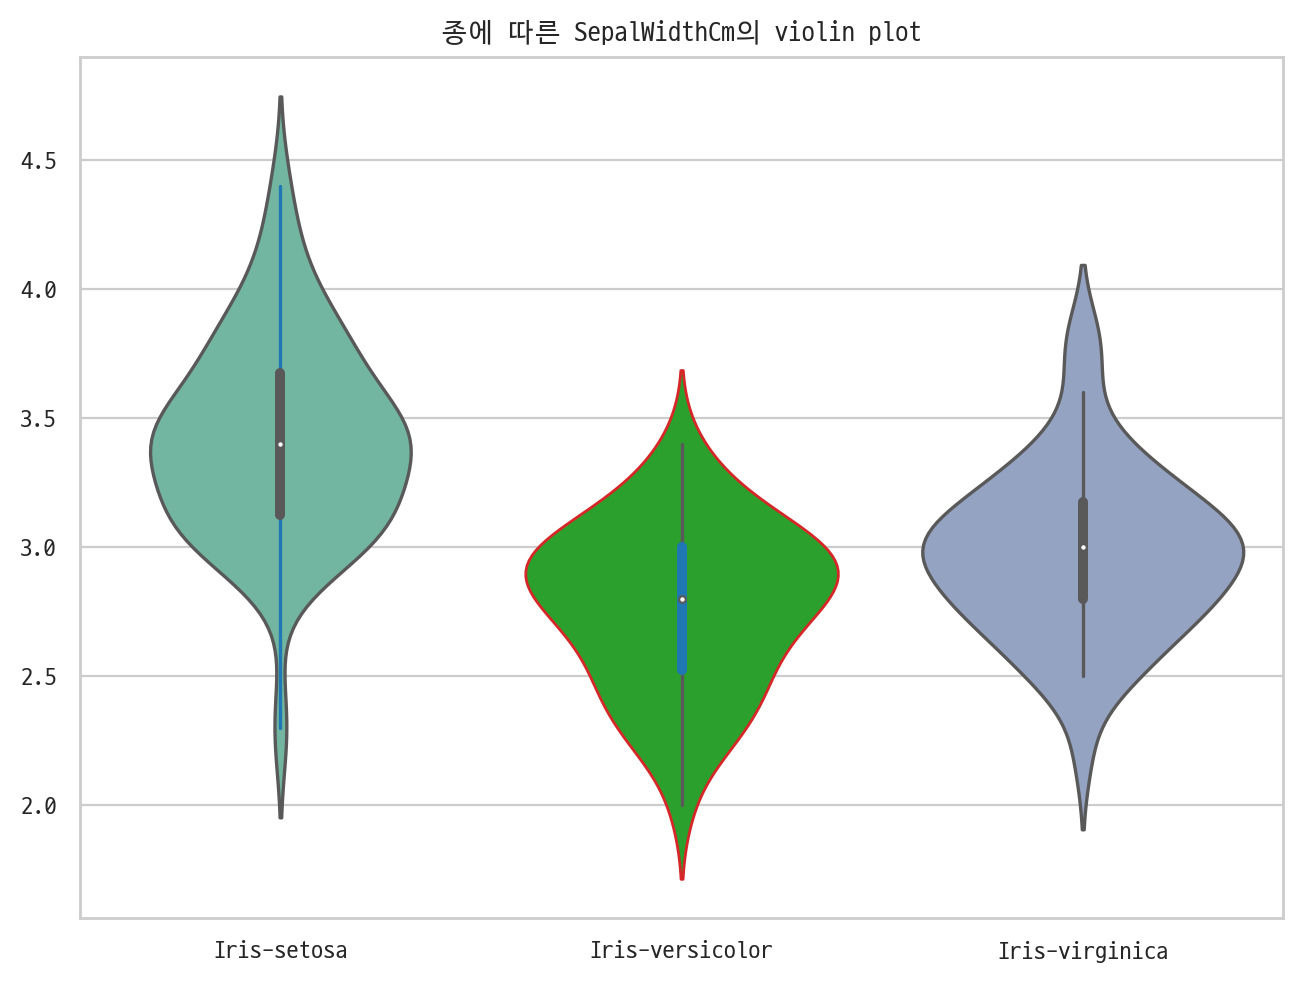

In [13]:
fig, ax = plt.subplots()

sns.violinplot(data = iris,
               x = "Species",
               y = feature_y,
               ax = ax);

ax.set(xlabel = "", 
       ylabel = "",
       title = f"종에 따른 {feature_y}의 violin plot");

color = ['tab:red','tab:green','tab:blue','tab:orange','black','gray']

#collection의 정보 알기

for i, obj in enumerate(ax.collections):
       if i == 2:
              obj.set_ec(color[0]) #edge color
              obj.set_fc(color[1]) #face color
              obj.set_lw(1)
              #obj.set_sizes([30])

for i, line in enumerate(ax.lines):
       if i==0:
              line.set_color(color[2])
       if i==3:
              line.set_color(color[2])

In [14]:
ax.collections

<Axes.ArtistList of 6 collections>

In [15]:
ax.lines

<Axes.ArtistList of 6 lines>

# 3. 모범 사례를 재현해 보자

In [16]:
df_peng = sns.load_dataset("penguins")
df_peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [17]:
df_peng['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

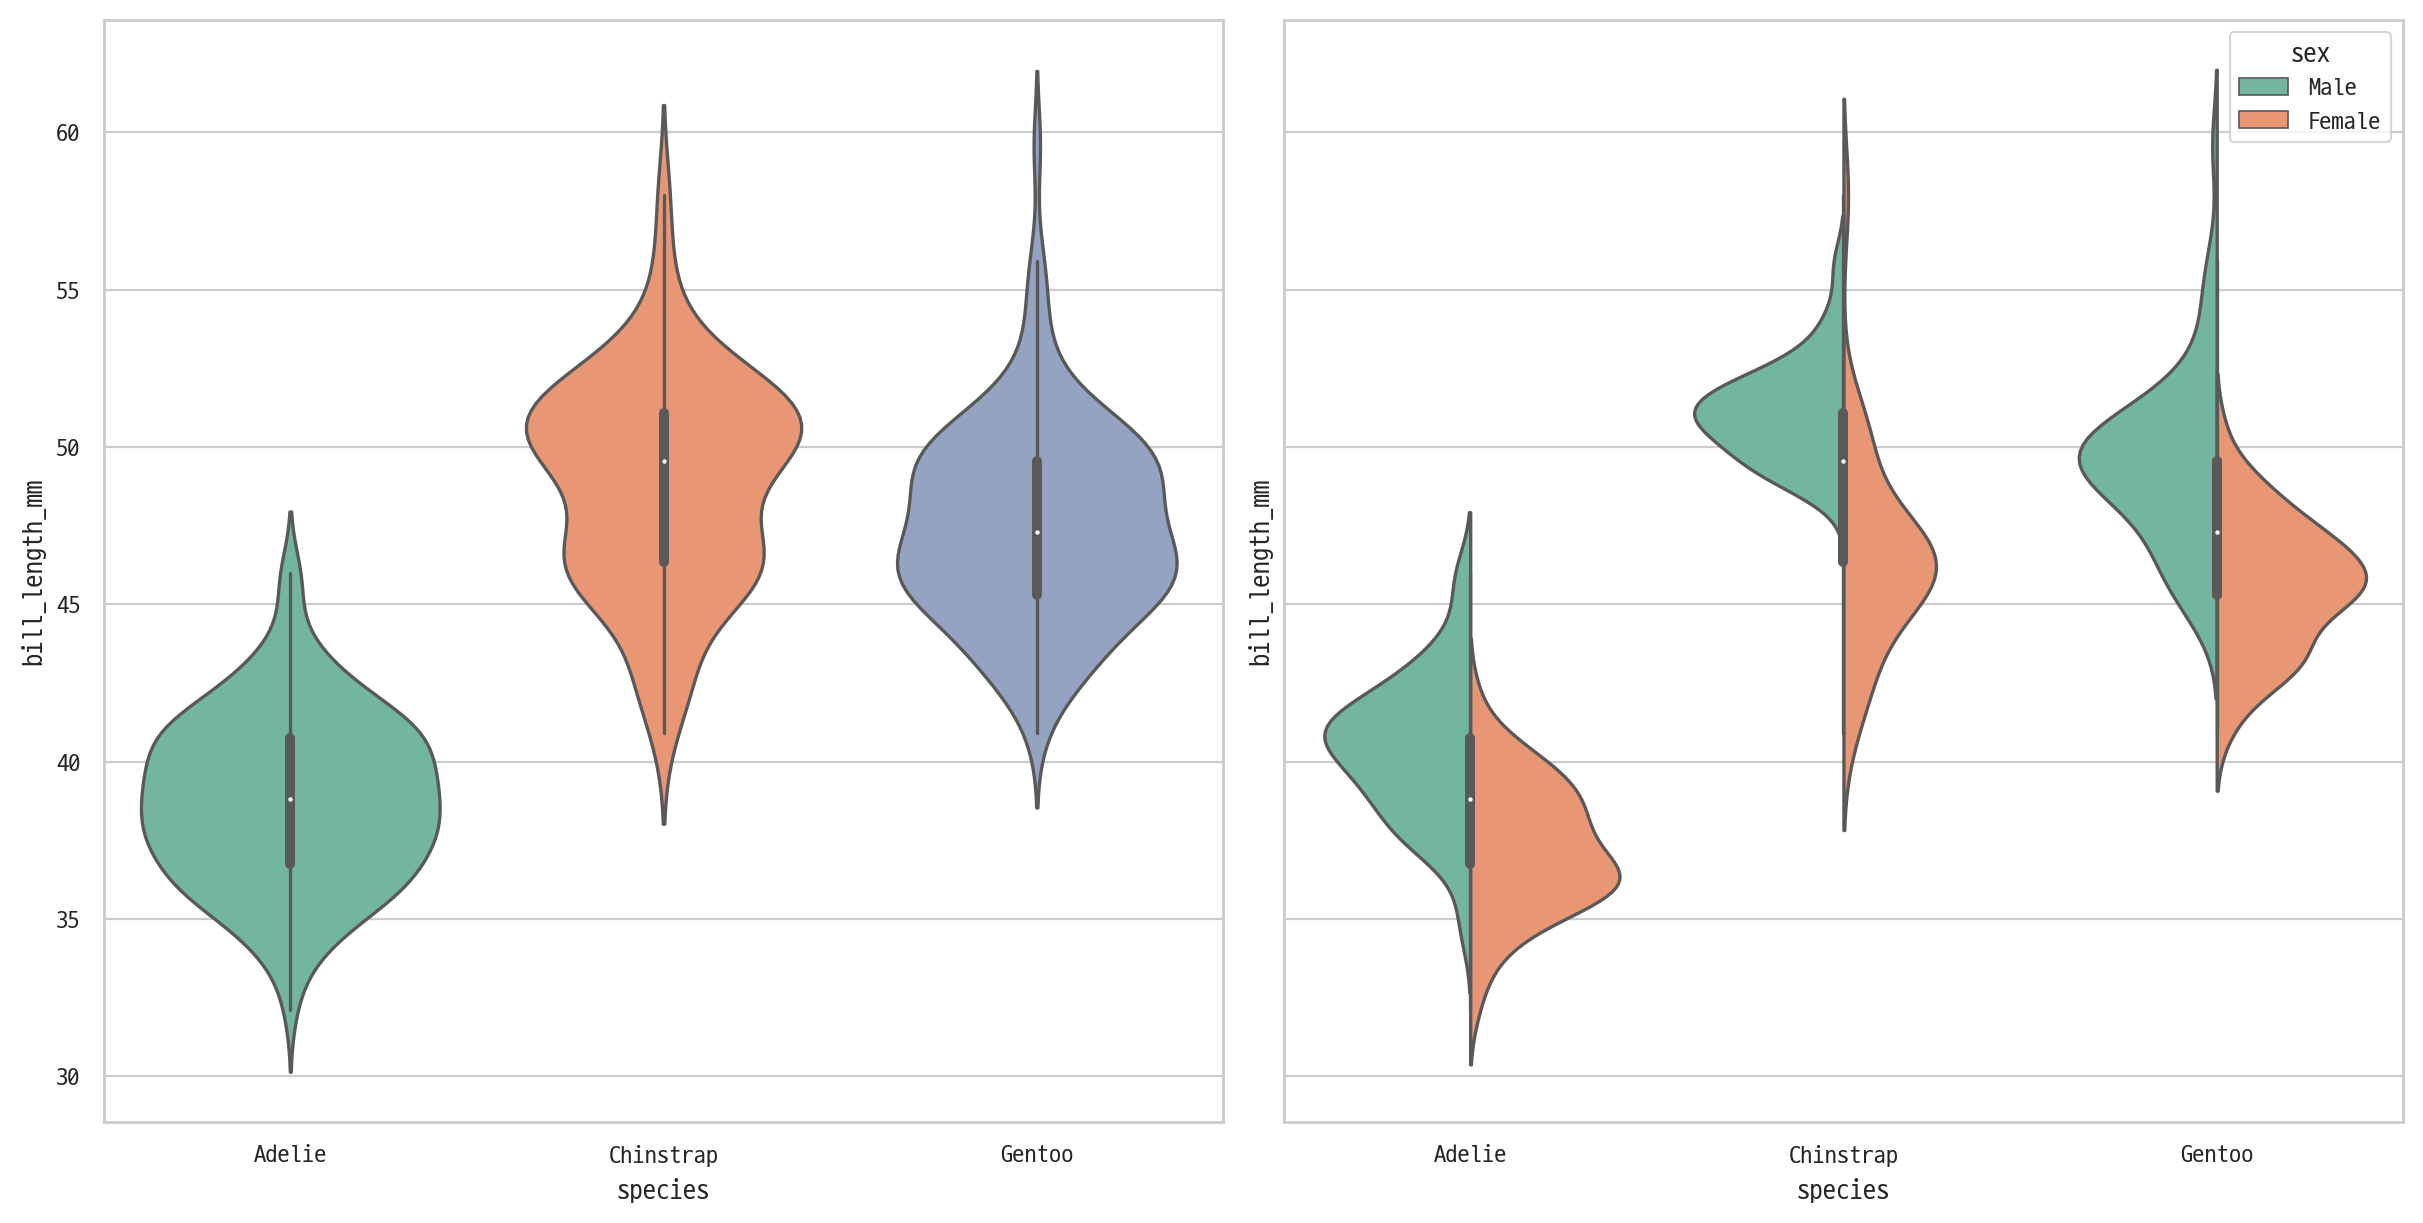

In [25]:
## ax1 : violin plot, 펭귄의 종별로 bill_length_mm 그래프를 그리시오 
## 

peng_species = df_peng['species'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

feature = 'bill_length_mm'
sns.violinplot(data = df_peng,
               x='species',
               y=feature,
               ax=ax1)

feature = 'bill_length_mm'
sns.violinplot(data = df_peng,
               x='species',
               y=feature,
               hue = 'sex',
               split = True,
               ax=ax2)


<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

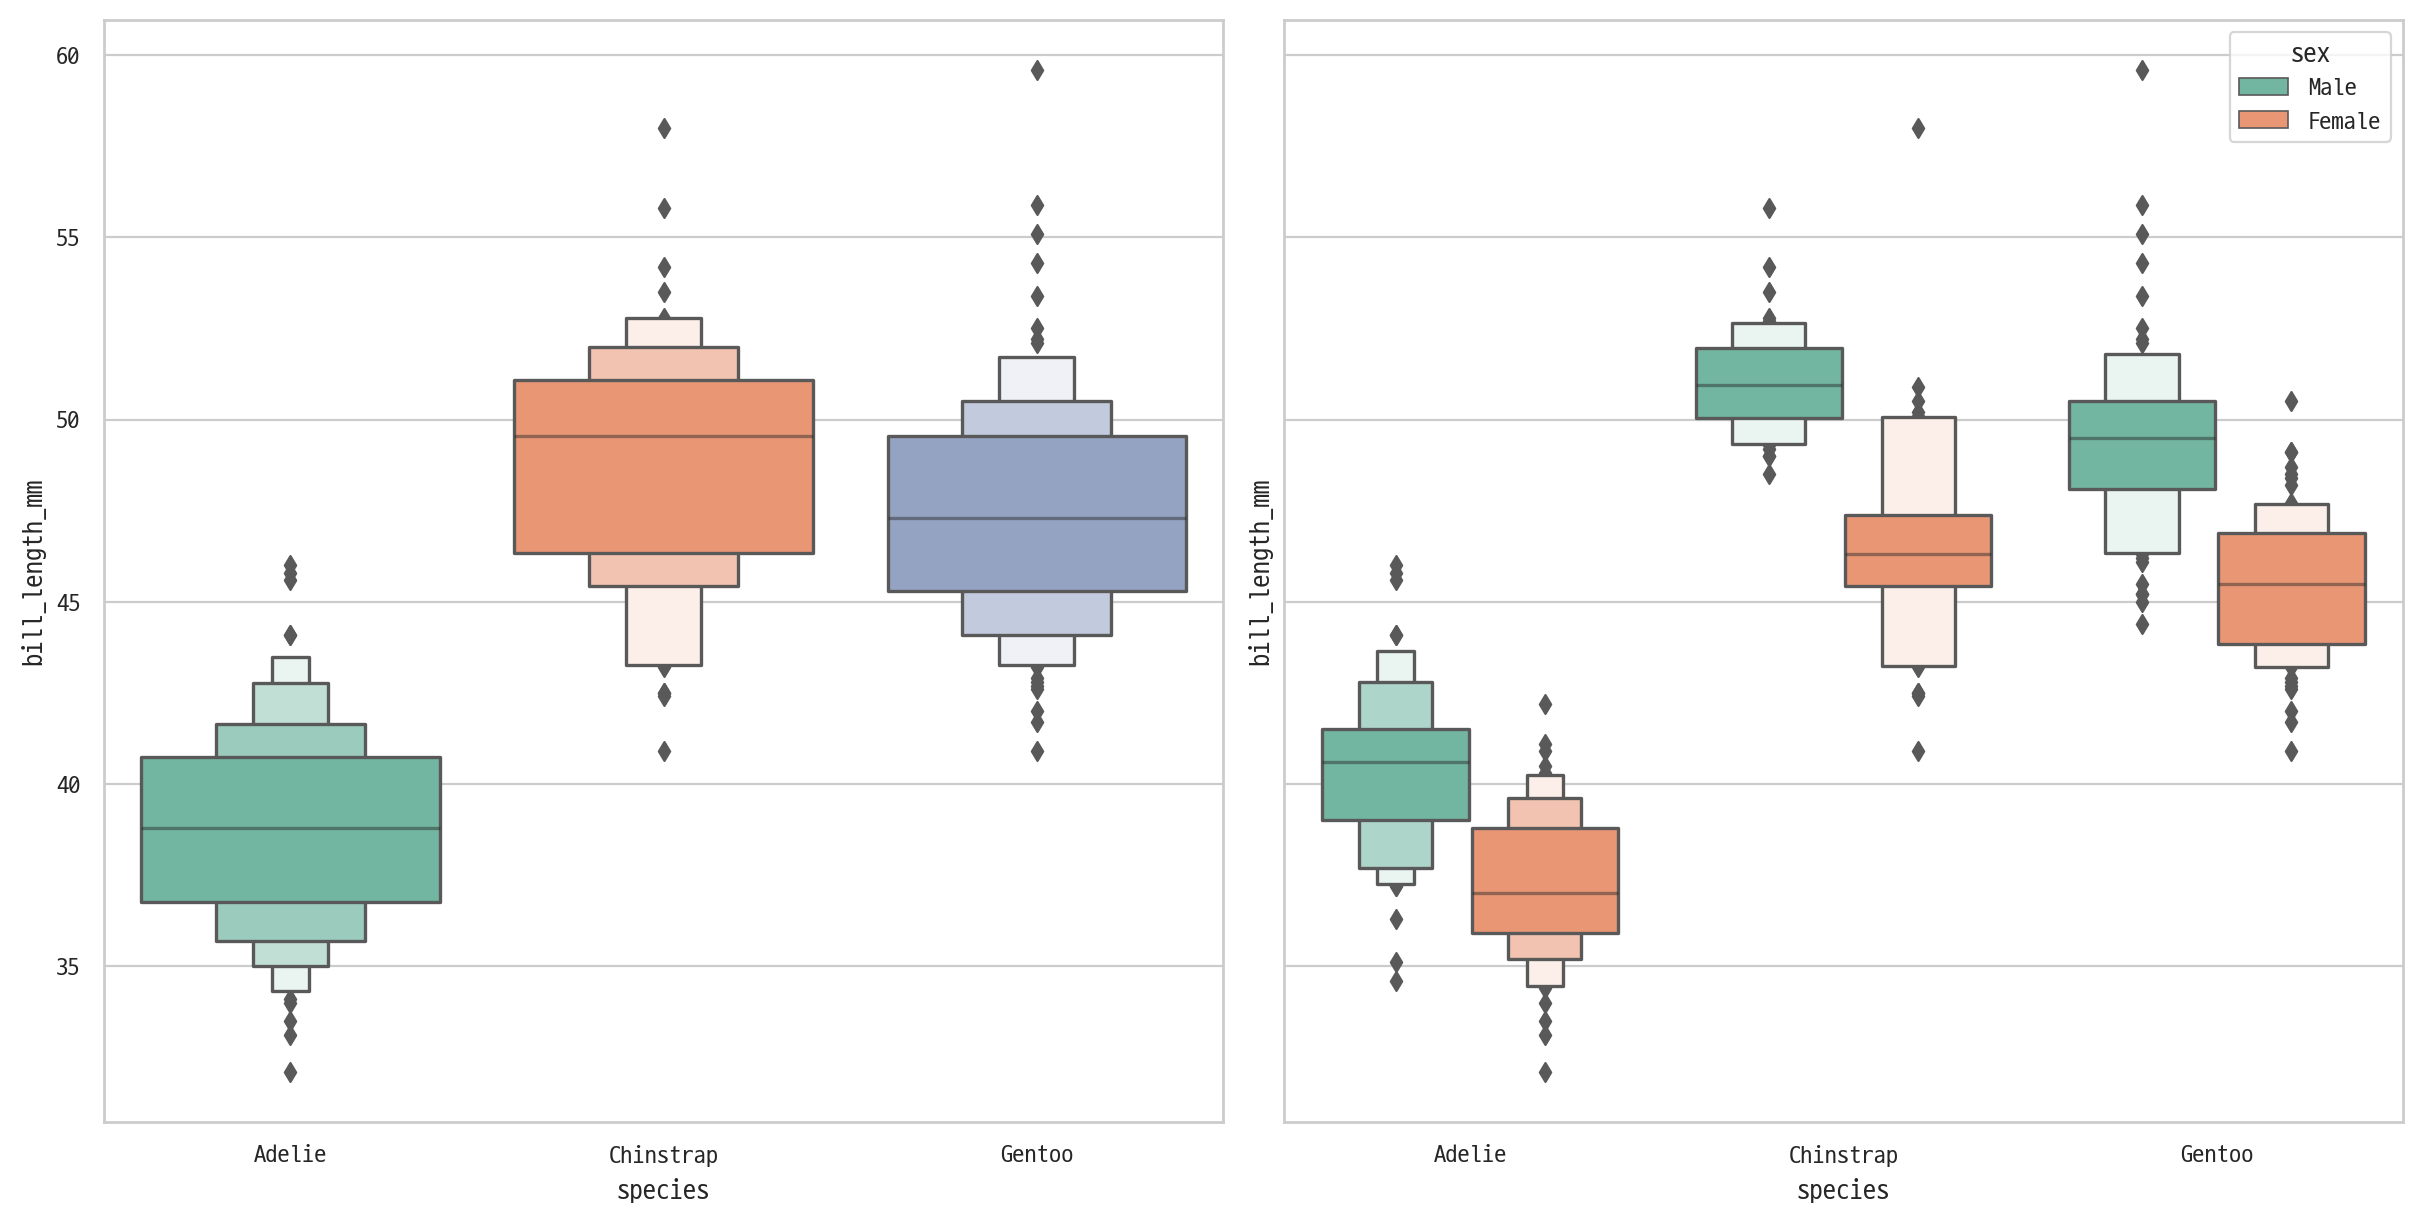

In [119]:
## ax1 : violin plot, 펭귄의 종별로 bill_length_mm 그래프를 그리시오 
## 

peng_species = df_peng['species'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

feature = 'bill_length_mm'
sns.boxenplot(data = df_peng,
               x='species',
               y=feature,
               ax=ax1)

feature = 'bill_length_mm'
sns.boxenplot(data = df_peng,
               x='species',
               y=feature,
               hue = 'sex',
#               split = True,
               ax=ax2)


<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

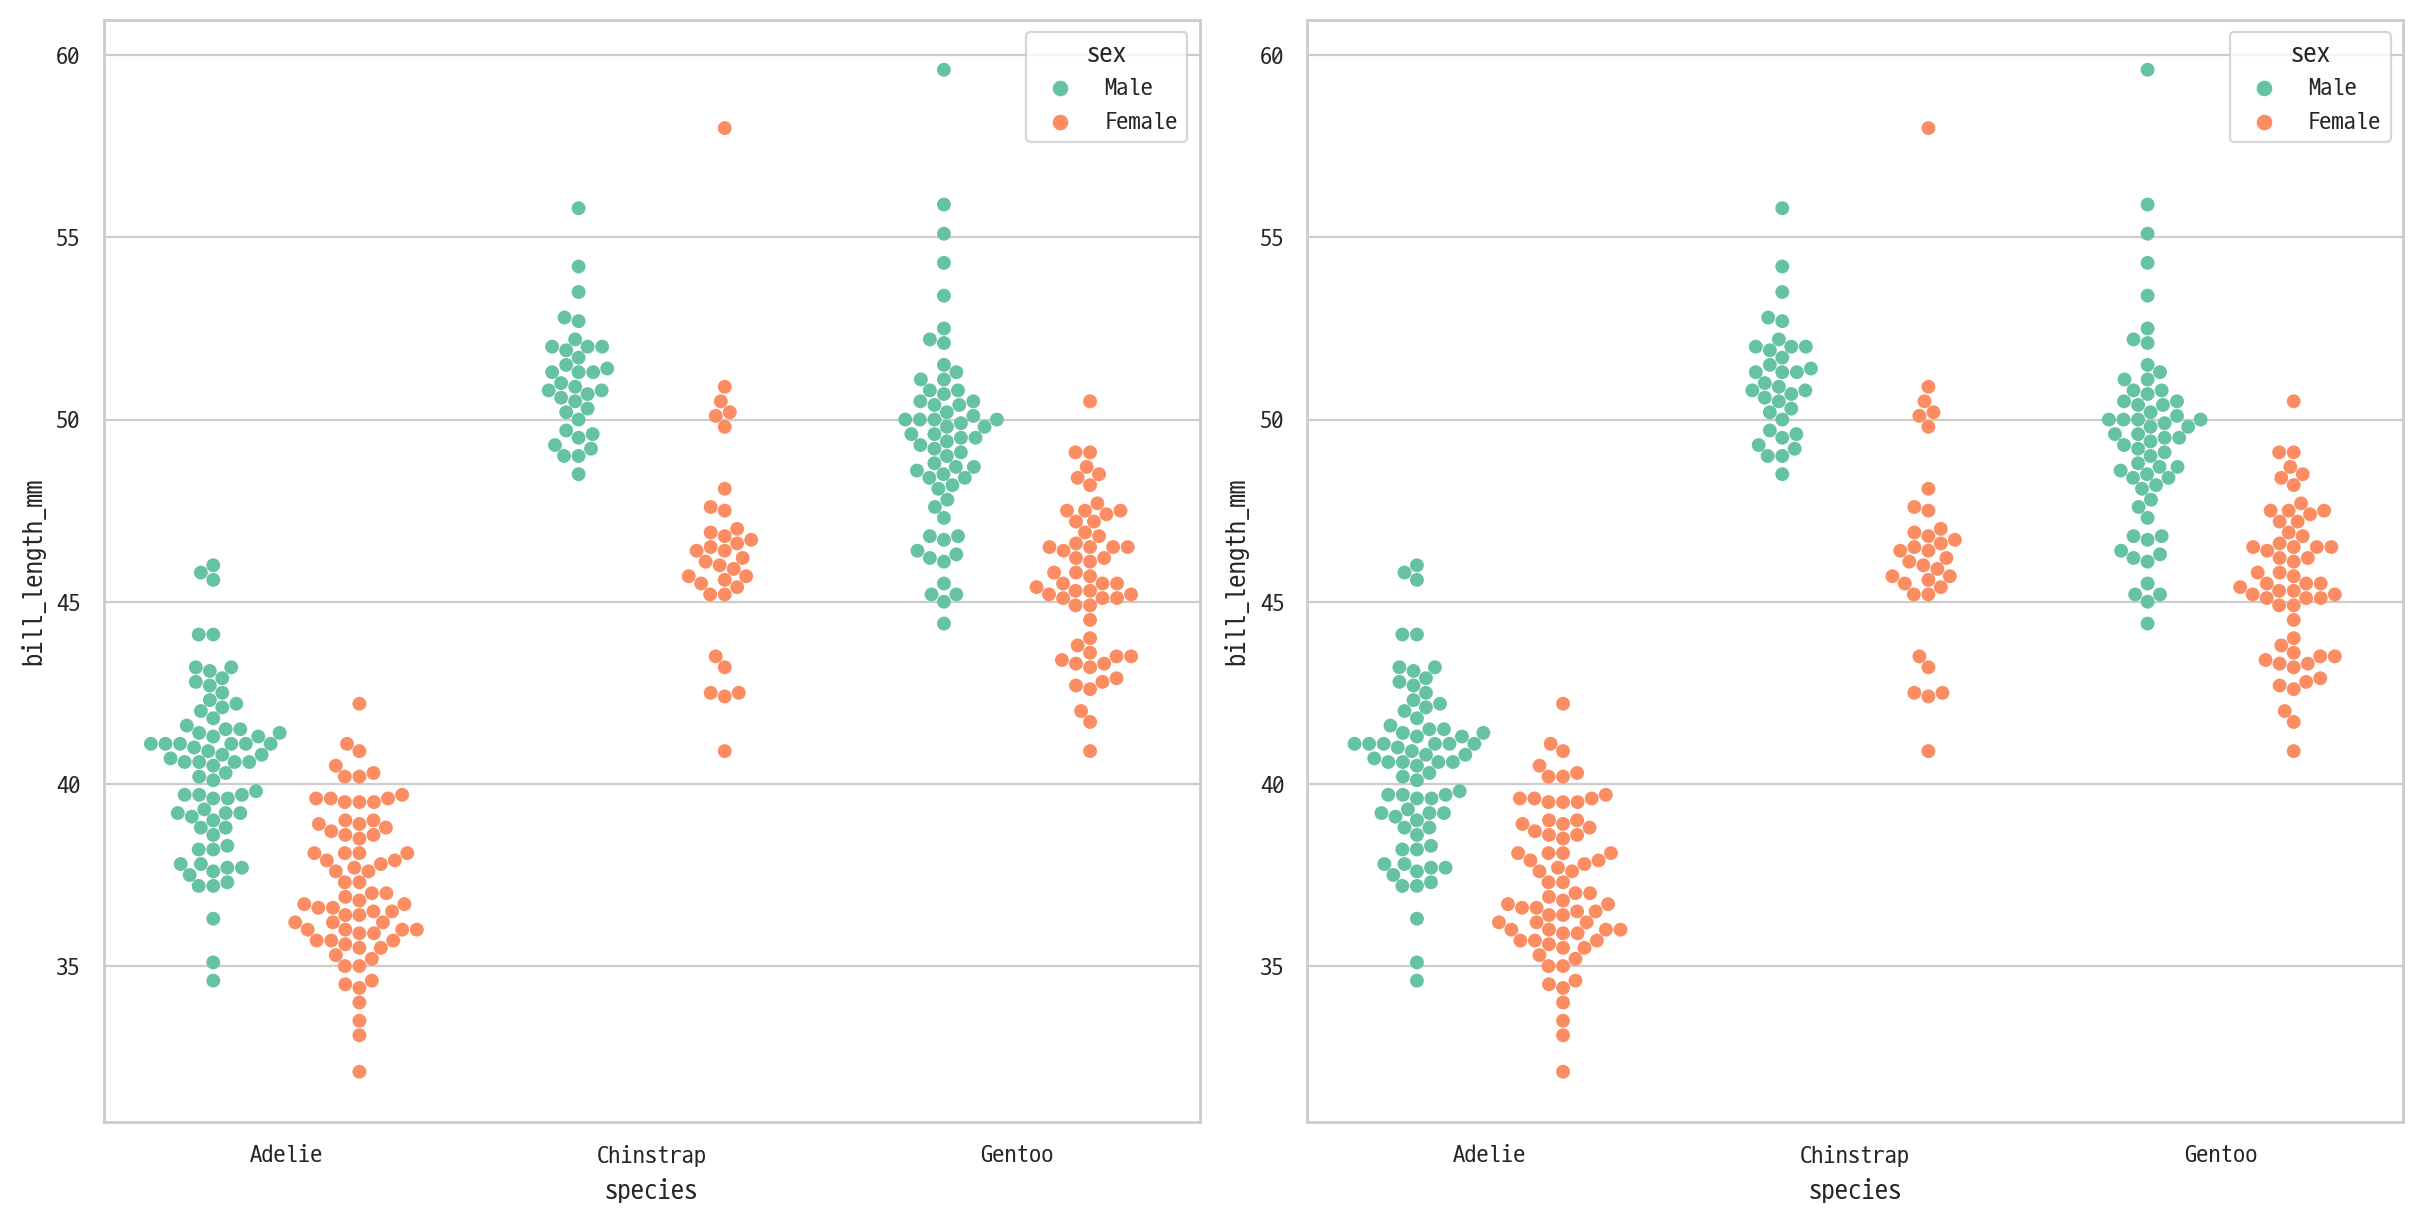

In [136]:
## ax1 : violin plot, 펭귄의 종별로 bill_length_mm 그래프를 그리시오 
## 

peng_species = df_peng['species'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=False)

feature = 'bill_length_mm'
sns.swarmplot(data = df_peng,
               x='species',
               y=feature,
               hue = 'sex',
               dodge = True,
               ax=ax1)

feature = 'bill_length_mm'
sns.swarmplot(data = df_peng,
               x='species',
               y=feature,
               hue = 'sex',
               dodge = True,
               order = sorted(df_peng['species'].unique()),
               ax=ax2)


In [141]:
df_peng[feature+'_int'] = df_peng[feature]
new_feat = feature+'_int'
df_peng.loc[~df_peng[feature].isna(),new_feat] =df_peng.loc[~df_peng[feature].isna(),feature].apply(int)

<AxesSubplot: xlabel='species', ylabel='bill_length_mm_int'>

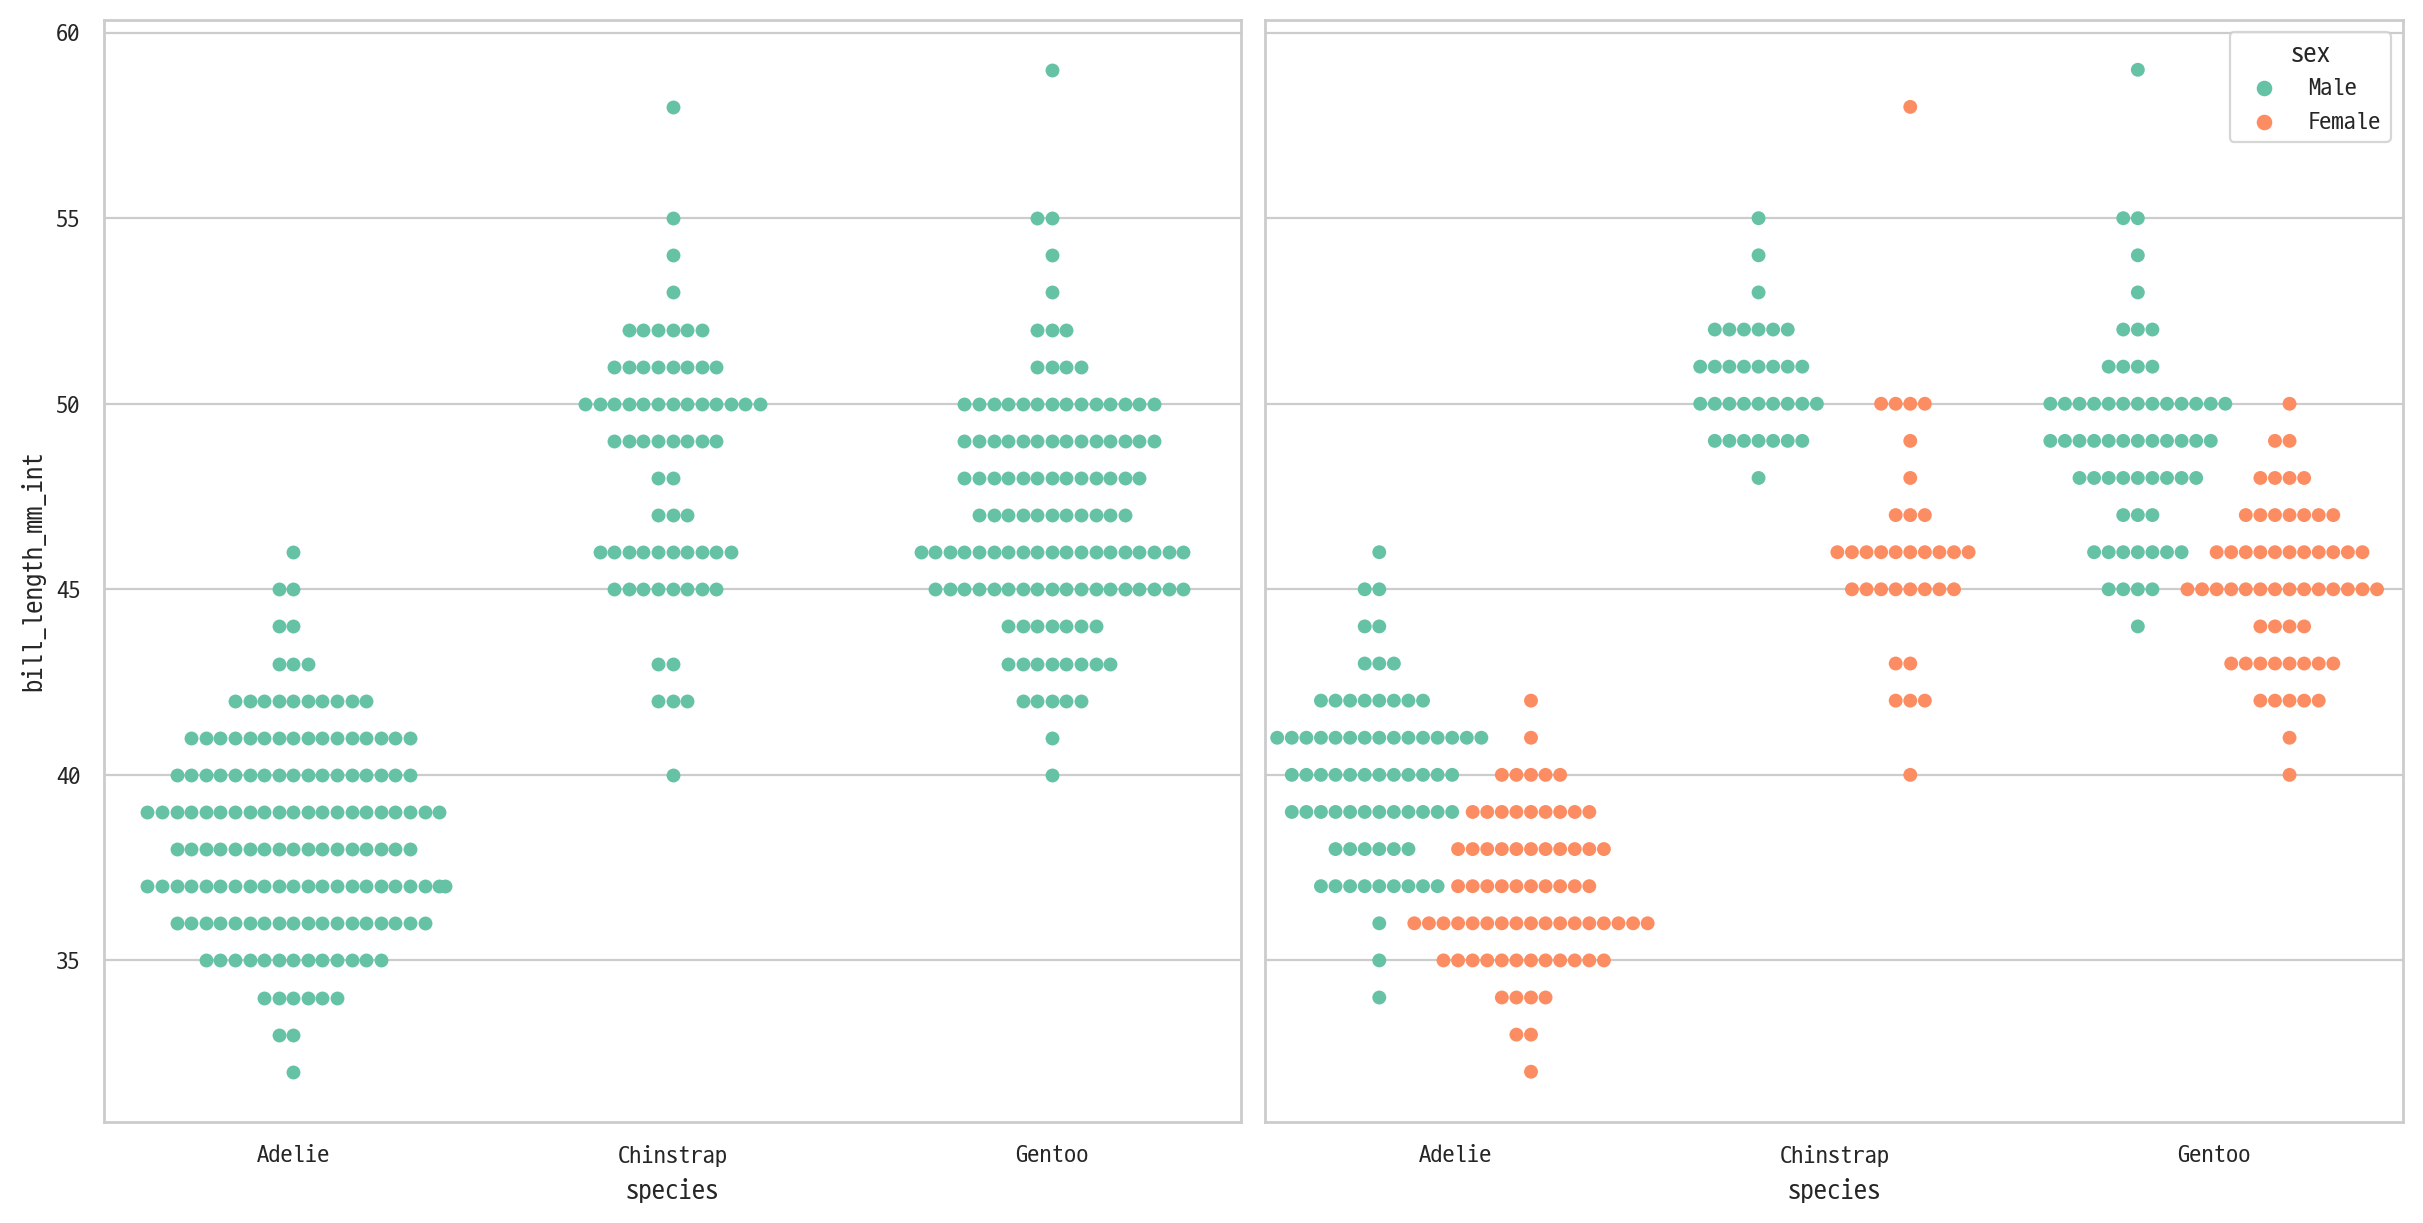

In [145]:
## ax1 : violin plot, 펭귄의 종별로 bill_length_mm 그래프를 그리시오 
## 

peng_species = df_peng['species'].unique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

sns.swarmplot(data = df_peng,
               x='species',
               y=new_feat,
               dodge = True,
               ax=ax1)

sns.swarmplot(data = df_peng,
               x='species',
               y=new_feat,
               hue = 'sex',
               dodge = True,
               ax=ax2)


In [26]:
import matplotlib.colors as mcolors
import colorsys

def set_hls(c, dh=0, dl=0, ds=0, dalpha=0):
    """
    c : (array -like, str) color in RGB space
    dh : (float) change in Hue
        default = 0
    dl : (float) change in Lightness
        default = 0
    ds : (float) change in Saturation
        default = 0
    """
    # 입력된 color를 RGBA numpy array로 변환
    c_rgba = mcolors.to_rgba(c)
    
    # RGB와 alpha 분리
    c_rgb = c_rgba[:3]
    alpha = c_rgba[3]
    
    # RGB 색공간을 HLS 색공간으로 변환 후 입력된 변화 적용
    c_hls = colorsys.rgb_to_hls(*c_rgb)
    h = c_hls[0] + dh
    l = max(min(c_hls[1] + dl, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    s = max(min(c_hls[2] + ds, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    
    # HLS 색공간에서 변경된 색을 RGB 색공간으로 변환
    c_rgb_new = colorsys.hls_to_rgb(h, l, s)
    alpha = max(min(alpha+dalpha, 1), 0)  # 0~1 범위를 넘지 않도록 제어
    
    return np.append(c_rgb_new, alpha) # alpha 추가하여 return

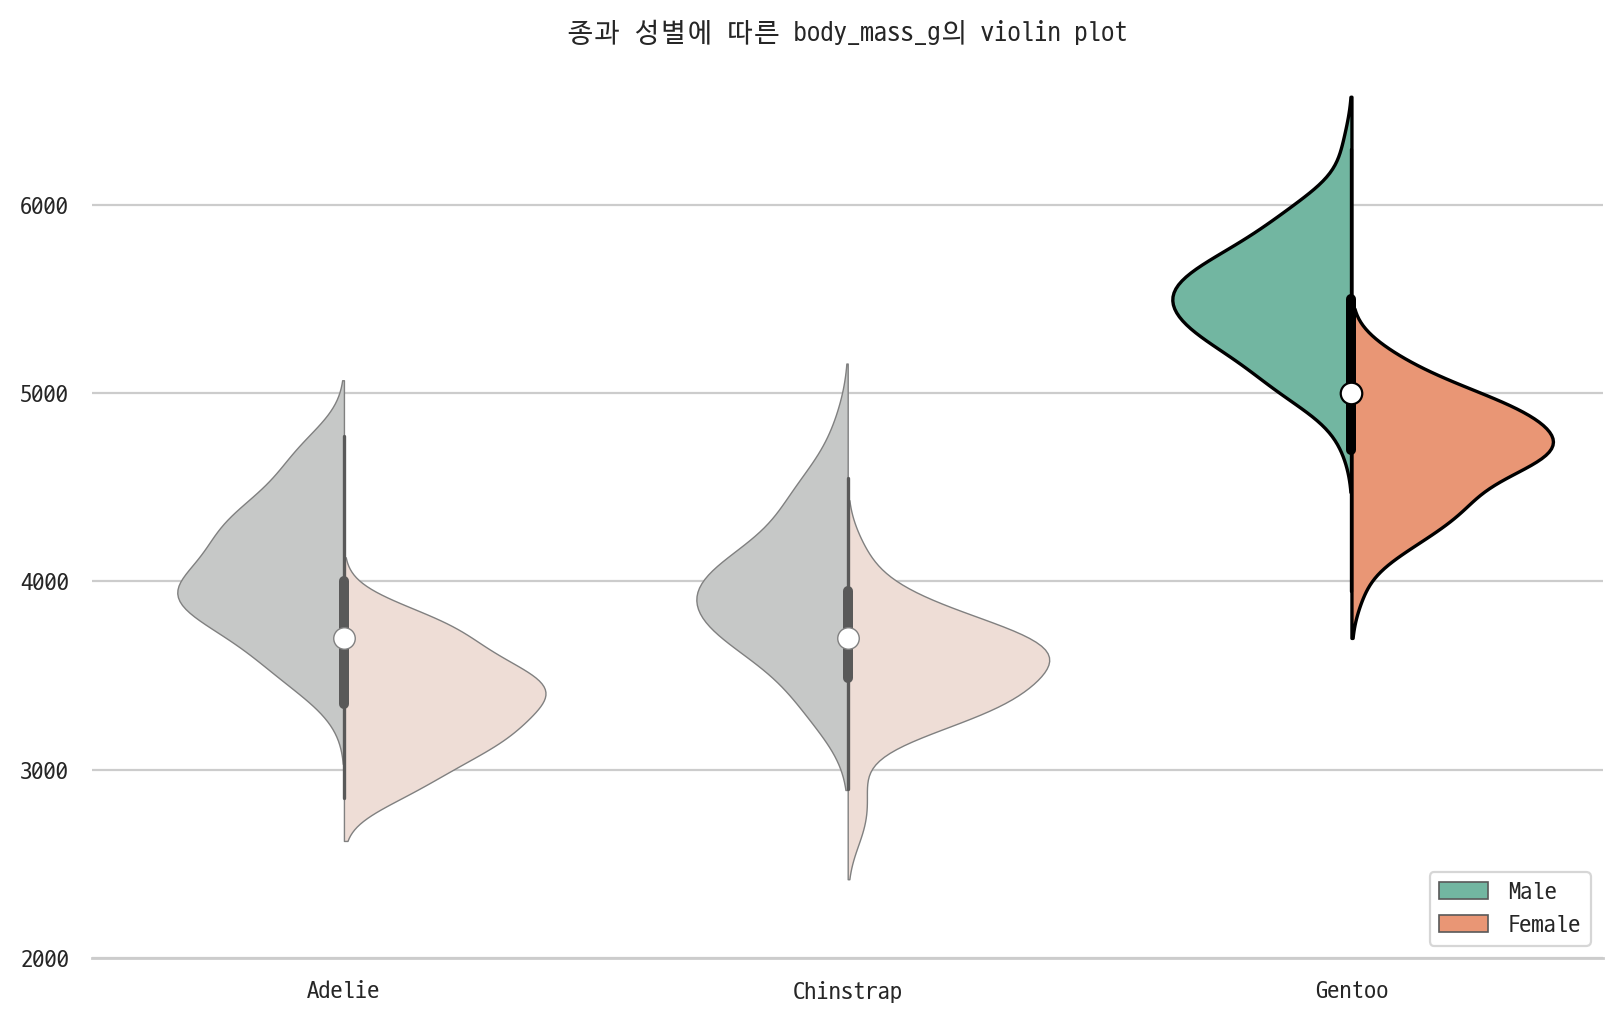

In [36]:
fig, ax = plt.subplots(figsize=(8, 5))

feature = "body_mass_g"
sns.violinplot(data = df_peng,
               x = "species",
               y = feature,
               hue = "sex",
               split = True,
               ax = ax)

for i, obj in enumerate(ax.collections):
    if i < 6: 
        obj.set_ec("gray")
        obj.set_lw(0.5)
        obj.set_fc(set_hls(obj.get_fc(), ds = -0.3, dl = 0.2)) #왼쪽 두개 흐리게 한 것
    else:
        obj.set_ec("k")
        
    if (i+2)%3  == 0:
        obj.set_sizes([60])
        obj.set_fc("white")

for i, line in enumerate(ax.lines):
    if i > 3:
        line.set_color("k")
        

ax.set(xlabel = "",
       ylabel = "",
       title = f"종과 성별에 따른 {feature}의 violin plot")

ax.set_ylim(ymin = 2000)
ax.spines[["top", "right", "left"]].set_visible(False)
ax.legend(loc = "lower right");

In [35]:
for ele in ax.collections:
    print(ele, type(ele))
    print(ele.edgecolors)

<matplotlib.collections.PolyCollection object at 0x7f4f3d3231c0> <class 'matplotlib.collections.PolyCollection'>


AttributeError: 'PolyCollection' object has no attribute 'edgecolors'

In [21]:
film_title = [
    "명량",
    "극한직업",
    "신과함께-죄와 벌",
    "국제시장",
    "어벤져스: 엔드게임",
    "겨울왕국 2",
    "베테랑",
    "아바타",
]

admissions = [
    17_613_682,
    16_264_944,
    14_410_754,
    14_257_115,
    13_934_592,
    13_747_792,
    13_414_372,
    13_338_863,
]

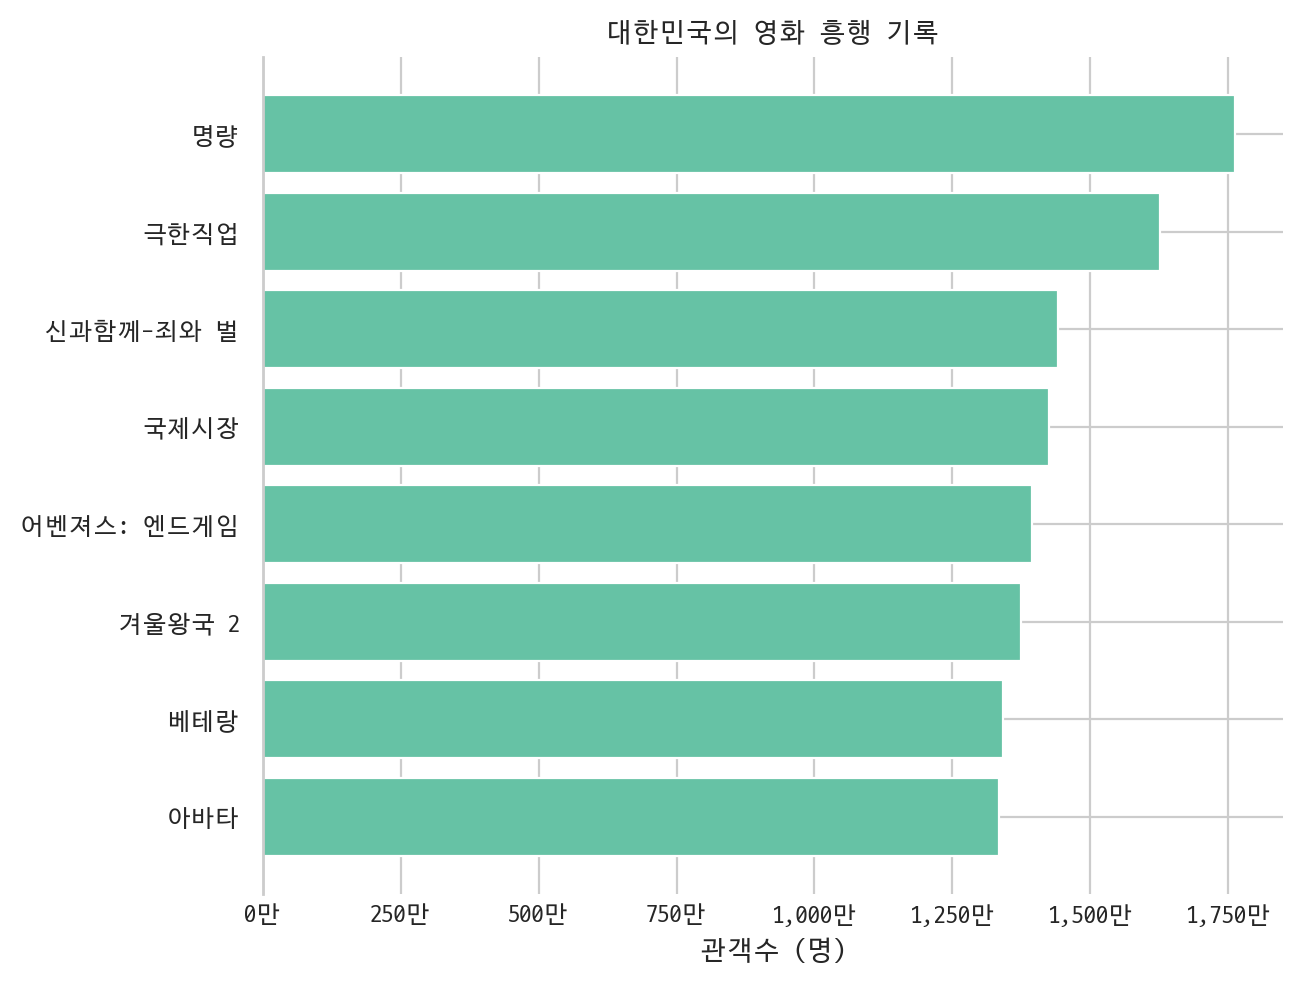

In [38]:
fig, ax = plt.subplots()

ax.barh(film_title, admissions)
ax.xaxis.set_tick_params(length=0)

ax.set(
    xlabel="관객수 (명)",
    title="대한민국의 영화 흥행 기록",
)
ax.spines[["top", "right", "bottom"]].set_visible(False)
#ax.grid(axis="x")

ax.invert_yaxis() #긴 얘가 위로 올라가게

from matplotlib.ticker import FuncFormatter
admission_formatter = FuncFormatter(lambda x, pos :f'{x/10000:,.0f}만')
ax.xaxis.set_major_formatter(admission_formatter)

In [ ]:
ryu = ['명량','극한직업']
hwang = ['국제시장','베테랑']

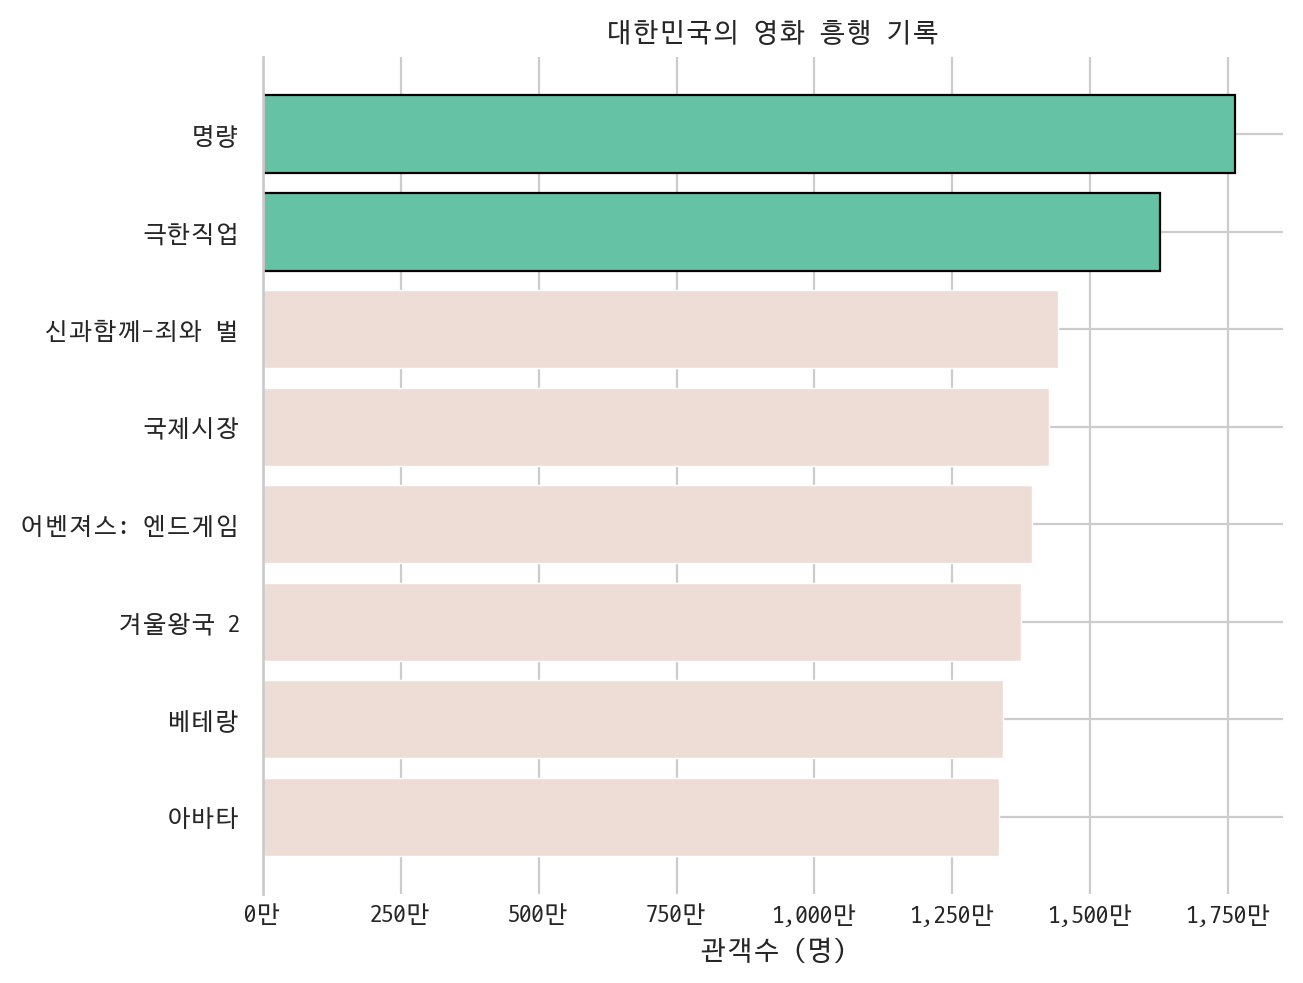

In [42]:
# 류승룡이 나온 영화만 강조해 보자.
fig, ax = plt.subplots()

ax.barh(film_title, admissions)
ax.xaxis.set_tick_params(length=0)

ax.set(
    xlabel="관객수 (명)",
    title="대한민국의 영화 흥행 기록",
)
ax.spines[["top", "right", "bottom"]].set_visible(False)
#ax.grid(axis="x")

ax.invert_yaxis() #긴 얘가 위로 올라가게

from matplotlib.ticker import FuncFormatter
admission_formatter = FuncFormatter(lambda x, pos :f'{x/10000:,.0f}만')
ax.xaxis.set_major_formatter(admission_formatter)

for i, p in enumerate(ax.patches):
    if i>1:
        p.set_ec('w')
        p.set_lw(0.5)
        p.set_fc(set_hls(obj.get_fc(),ds=-0.3,dl=0.2))
    else : p.set_ec('k')

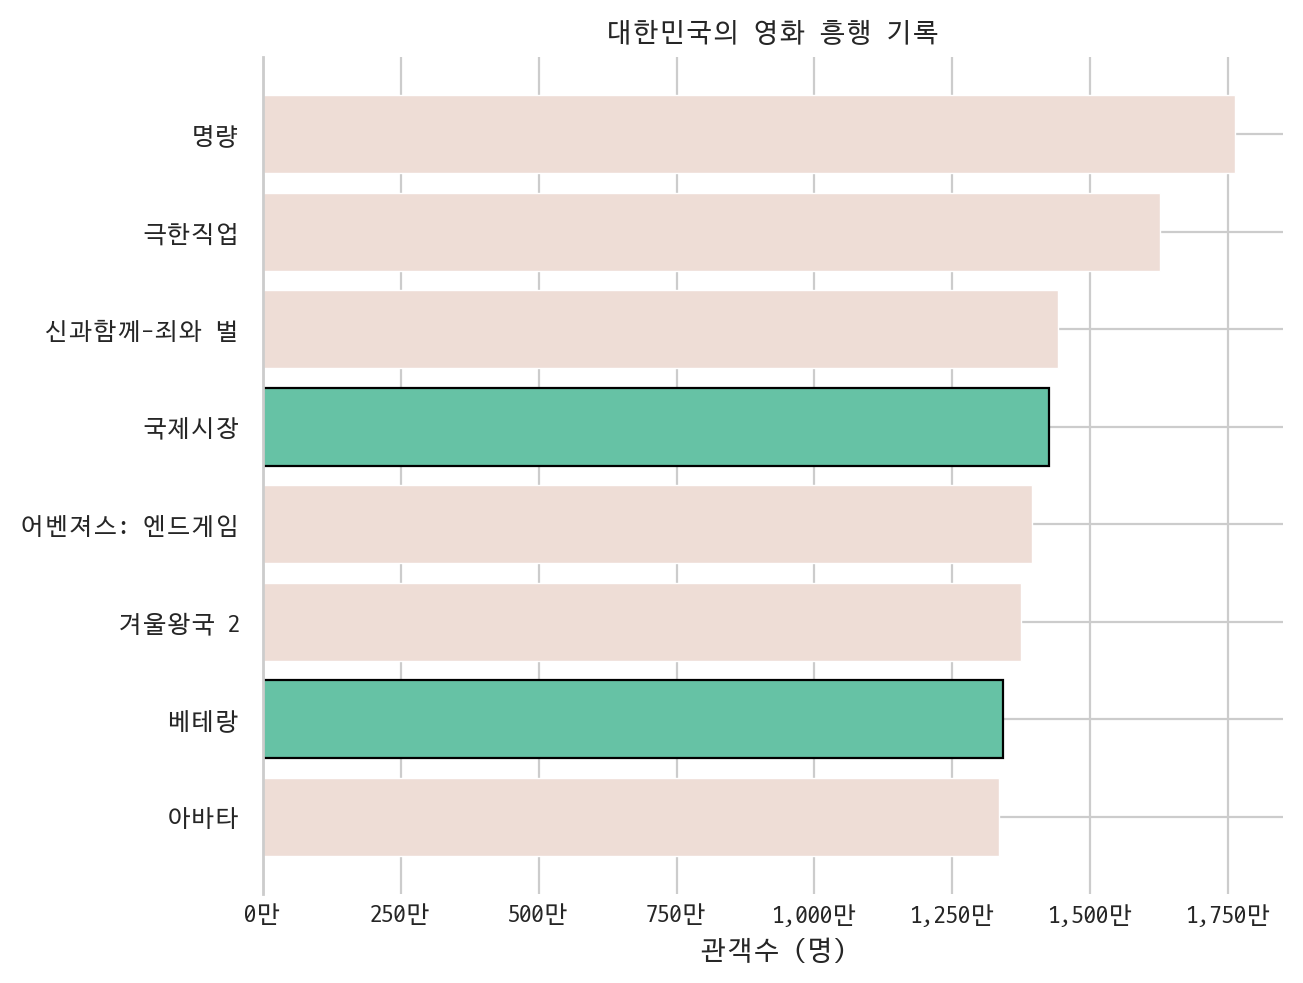

In [146]:
## 황정민이 나온 영화만 강조해 보자.
fig, ax = plt.subplots()

ax.barh(film_title, admissions)
ax.xaxis.set_tick_params(length=0)

ax.set(
    xlabel="관객수 (명)",
    title="대한민국의 영화 흥행 기록",
)
ax.spines[["top", "right", "bottom"]].set_visible(False)
#ax.grid(axis="x")

ax.invert_yaxis() #긴 얘가 위로 올라가게

from matplotlib.ticker import FuncFormatter
admission_formatter = FuncFormatter(lambda x, pos :f'{x/10000:,.0f}만')
ax.xaxis.set_major_formatter(admission_formatter)

for i, p in enumerate(ax.patches):
    if i not in [3,6]:
        p.set_ec('w')
        p.set_lw(0.5)
        p.set_fc(set_hls(obj.get_fc(),ds=-0.3,dl=0.2))
        #p.set_fc(sns.set_hls_values(obj.get_fc(),l=0.9))
    else : p.set_ec('k')


In [39]:
for ele in ax.patches:
    print(type(ele))

<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>


In [54]:
getattr(ax,"patches")

<Axes.ArtistList of 8 patches>

In [55]:
ax.patches

<Axes.ArtistList of 8 patches>

In [40]:
for ele in ax.collections:
    print(type(ele))

In [41]:
for ele in ax.lines:
    print(type(ele))

In [52]:
for ele in (dir(ax)):
    print(ele, type(ele))

ArtistList <class 'str'>
_AxesBase__clear <class 'str'>
_PROPERTIES_EXCLUDED_FROM_SET <class 'str'>
__class__ <class 'str'>
__delattr__ <class 'str'>
__dict__ <class 'str'>
__dir__ <class 'str'>
__doc__ <class 'str'>
__eq__ <class 'str'>
__format__ <class 'str'>
__ge__ <class 'str'>
__getattribute__ <class 'str'>
__getstate__ <class 'str'>
__gt__ <class 'str'>
__hash__ <class 'str'>
__init__ <class 'str'>
__init_subclass__ <class 'str'>
__le__ <class 'str'>
__lt__ <class 'str'>
__module__ <class 'str'>
__ne__ <class 'str'>
__new__ <class 'str'>
__reduce__ <class 'str'>
__reduce_ex__ <class 'str'>
__repr__ <class 'str'>
__setattr__ <class 'str'>
__setstate__ <class 'str'>
__sizeof__ <class 'str'>
__str__ <class 'str'>
__subclasshook__ <class 'str'>
__weakref__ <class 'str'>
_add_text <class 'str'>
_adjustable <class 'str'>
_agg_filter <class 'str'>
_alias_map <class 'str'>
_alpha <class 'str'>
_anchor <class 'str'>
_animated <class 'str'>
_aspect <class 'str'>
_autotitlepos <class 'str'

In [63]:
dir(ax)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

In [67]:
ax.__dict__

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <AxesSubplot: title={'center': '대한민국의 영화 흥행 기록'}, xlabel='관객수 (명)'>,
 'figure': <Figure size 640x480 with 1 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7f4f3d9ba040>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 640x480 with 1 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.1960074652777778, 0.08059422743055557], [0.9934890625, 0.9520175347222223]]),
 '_originalPosition': Bbox([[0.1960074652777778, 0.08059422743055557], [0.9934890625, 0.9520175347222223]]),

In [107]:
getattr(ax,'_axes')

<AxesSubplot: title={'center': '대한민국의 영화 흥행 기록'}, xlabel='관객수 (명)'>

In [108]:
ax._axes

<AxesSubplot: title={'center': '대한민국의 영화 흥행 기록'}, xlabel='관객수 (명)'>

In [109]:
'_axes' in dir(ax)

True

In [110]:
'_axes' in ax.__dict__

True

In [79]:
methd_dict = {
    n : [ele,type(ele)]
    for n,ele in enumerate(dir(ax))
}

df = pd.DataFrame(methd_dict).T

df.head()

df.describe()

,0,1
count,453,453
unique,453,1
top,ArtistList,<class 'str'>
freq,1,453


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 452
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       453 non-null    object
 1   1       453 non-null    object
dtypes: object(2)
memory usage: 10.6+ KB


In [89]:
df_temp = df.astype(str)

In [90]:
df_temp.loc[1,1]

"<class 'str'>"

In [97]:
df_temp.rename(columns={0:'ele',1:'class_type'},inplace=True)

In [98]:
df_temp.columns

Index(['ele', 'class_type'], dtype='object')

In [99]:
df_temp.groupby(by='class_type').agg(list)

,ele
class_type,
<class 'str'>,"[ArtistList, _AxesBase__clear, _PROPERTIES_EXC..."


In [113]:
'patches' in ax.__dict__

False

In [111]:
'patches' in dir(ax)

True

In [103]:
dir(ax)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_

In [105]:
'ArtistList' in dir(ax)

True

In [148]:
len(ax.__dict__)

81

In [153]:
len((ax.patches[0]).__dict__)

47

In [157]:
ax.patches[0].__dict__

{'_stale': False,
 'stale_callback': <function matplotlib.artist._stale_axes_callback(self, val)>,
 '_axes': <AxesSubplot: title={'center': '대한민국의 영화 흥행 기록'}, xlabel='관객수 (명)'>,
 'figure': <Figure size 640x480 with 1 Axes>,
 '_transform': <matplotlib.transforms.CompositeGenericTransform at 0x7f4f2e37ca00>,
 '_transformSet': True,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': <matplotlib.transforms.TransformedBbox at 0x7f4f2e321ee0>,
 '_clippath': None,
 '_clipon': True,
 '_label': '_nolegend_',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7f4f2e321df0>,
 '_remove_method': <function list.remove(value, /)>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[0], y=[]),
 '_in_layout': True,
 '_hatch_color': (1.0, 1.0, 1.0, 1),
 '_fill': True,
 '_original_edgecolor': 'w',
 '_edgecolor': (1.0, 1.0, 1.0, 1),
 '_or

In [158]:
ax.patches[0].get_fc()

(0.9342524509803921, 0.8650894448688566, 0.8382965686274509, 1.0)